In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib
import netCDF4 as nc
from datetime import date

In [2]:
trmm=xr.open_dataset('../ppt_data/trmm_monthly.nc',decode_times=False)
print(trmm)
ti,nlat,nlon=trmm.PPT.shape
print(trmm.PPT.shape)
trmmmth=trmm.PPT[:228,:,:].data.reshape((-1,12,nlat,nlon))

<xarray.Dataset>
Dimensions:  (lat: 400, lon: 1440, time: 234)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * lat      (lat) float32 -49.875 -49.625 -49.375 -49.125 -48.875 -48.625 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
Data variables:
    PPT      (time, lat, lon) float64 0.5119 0.5777 0.4229 0.3213 0.419 ...
Attributes:
    title:    monthly averaged precipitation combined microwave-IR with gauge...
(234, 400, 1440)


(19, 12, 400, 1440)


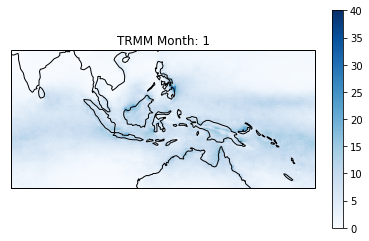

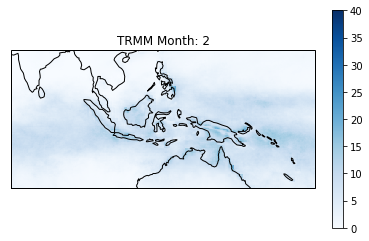

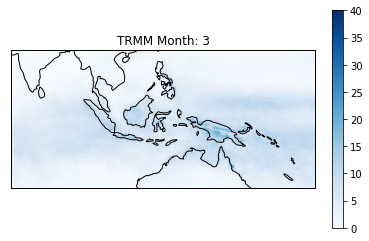

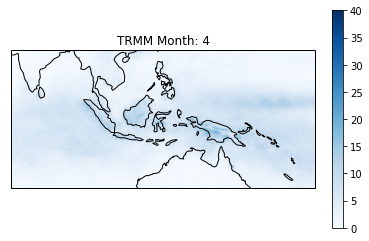

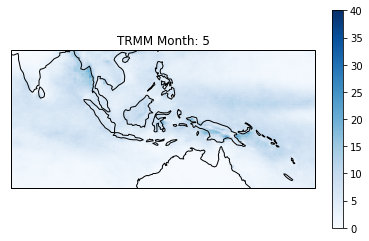

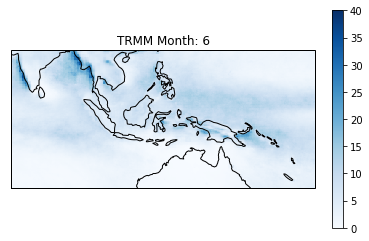

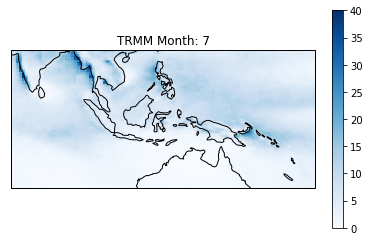

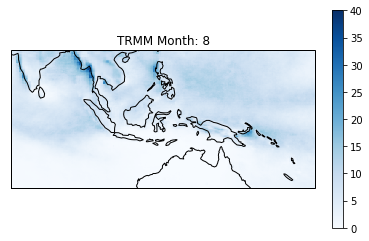

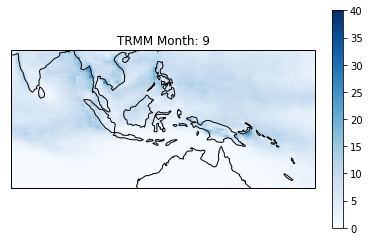

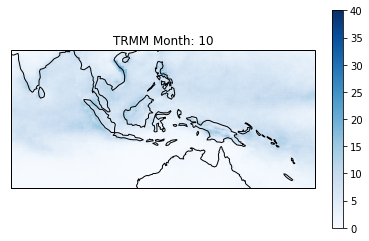

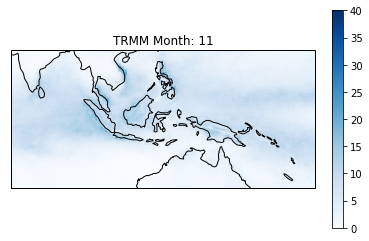

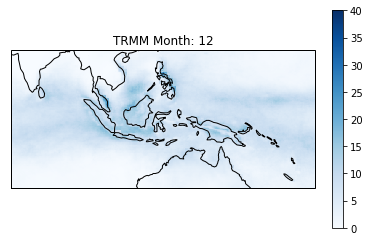

In [4]:
print(trmmmth.shape)
trmmyr=np.mean(trmmmth,axis=0)
minn=0
maxx=40
cmap = plt.get_cmap('Blues')
for tt in range (0,12):
    plt.figure(tt)
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(trmm.lon[1000:-20], trmm.lat[100:-110],trmmyr[tt,100:-110,1000:-20],vmin=minn,vmax=maxx,cmap=cmap)
    ax1.set_title('TRMM Month: '+str(tt+1))
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=minn, vmax=maxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    ax1.coastlines()
plt.show()

In [6]:
chirps=xr.open_dataset('../ppt_data/chirps-v2.0.monthly.nc')
print(chirps)
ti,nlat,nlon=chirps.precip.shape
chirps2=np.empty(chirps.precip.shape)
print(chirps.precip.shape)
chirps2[-1,:,:]=chirps.precip[-1,:,:]/31
for ii in range(1,ti):
    daysInMth=(chirps.coords['time'][ii]-chirps.coords['time'][ii-1]).data/np.timedelta64(1, 'D')
    chirps2[ii-1,:,:]=chirps.precip[ii-1,:,:]/daysInMth
chirpsmth=chirps2[:432,:,:].reshape((-1,12,nlat,nlon))
print(np.shape(chirpsmth))

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 439)
Coordinates:
  * latitude   (latitude) float32 -49.975 -49.925 -49.875 -49.825 -49.775 ...
  * longitude  (longitude) float32 -179.975 -179.925 -179.875 -179.825 ...
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 1981-03-01 ...
Data variables:
    precip     (time, latitude, longitude) float64 nan nan nan nan nan nan ...
Attributes:
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2017-08-16
    creator_name:      Pete Peterson
    creator_email:     pete@geog.ucsb.edu
    institution:       Climate Hazards Group.  University of California at Sa...
    documentation:     http://pubs.usgs.gov/ds/832/
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    ac

In [7]:
print(chirpsmth.shape)
chirpsyr=np.mean(chirpsmth,axis=0)
print(chirpsyr.shape)

(36, 12, 2000, 7200)
(12, 2000, 7200)


/home/likkhian/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


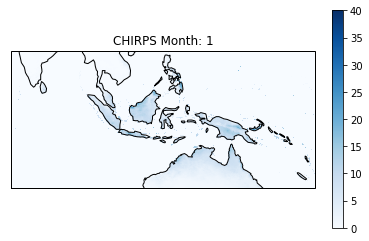

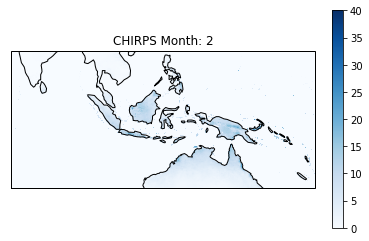

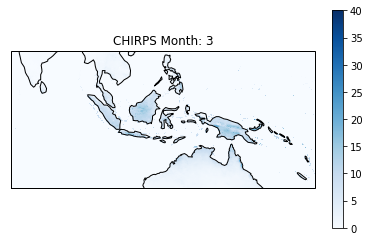

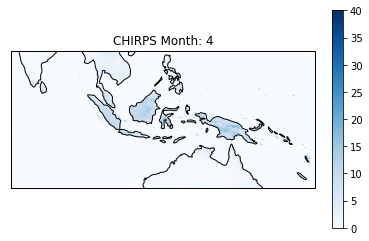

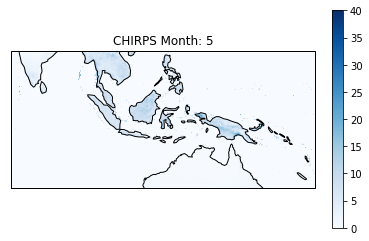

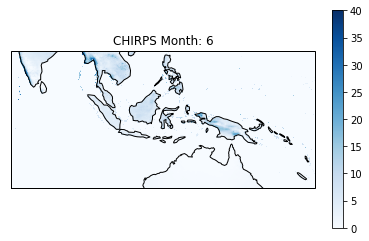

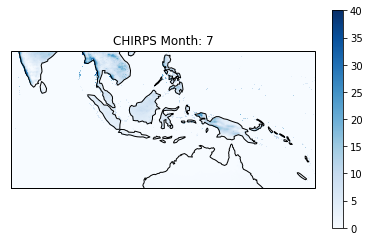

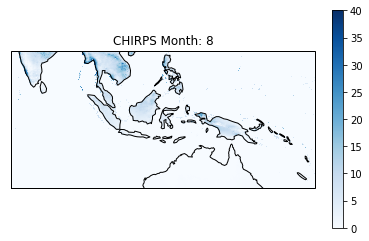

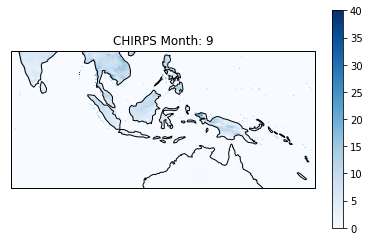

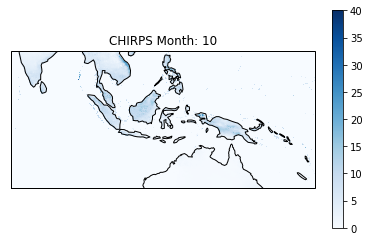

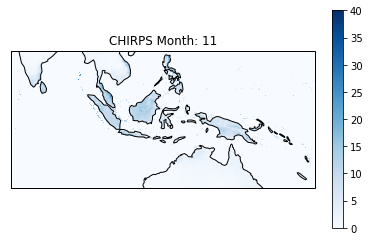

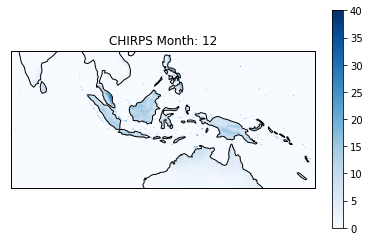

In [8]:
minn=0
maxx=40
cmap = plt.get_cmap('Blues')
for tt in range (0,12):
    plt.figure(tt)
    ax2=plt.subplot(projection=ccrs.PlateCarree())
    ax2.pcolor(chirps.longitude[5000:-200], chirps.latitude[500:-600],chirpsyr[tt,500:-600,5000:-200],cmap=cmap,vmin=minn,vmax=maxx)
    ax2.set_title('CHIRPS Month: '+str(tt+1))
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=minn, vmax=maxx))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05)
    ax2.coastlines()
plt.show()

In [ ]:
print((chirps.coords['time'][-1]-chirps.coords['time'][-2]).data/np.timedelta64(1, 'D'))
print(chirps.coords['time'][-1])